In [1]:
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot

Решим уравнение: $\frac{y"}{(1 + y^{\prime})^{\frac{3}{2}}} = 2(1 - x), y(0) = 0, y^{\prime}(0) = 0$

Приведем к виду: 
 $$\begin{equation} 
 \begin{cases}
   y^{\prime} = z\\
   z^{\prime} = 2(1 + z^2)^{\frac{3}{2}}(1 - x)\\
   y(0) = 0\\
   z(0) = 0
 \end{cases}
\end{equation}$$

In [36]:
#это схема с центральной разностью, которая очень быстро расходится. Уже на N  = 100
N = 100
h = 1.0 / N
x = [i * h for i in range(0, N + 1)]
z = np.zeros(N + 1)
y = np.zeros(N + 1)
z[0] = y[0] = 0.0
y[1] = 0.0
z[1] = 2.0
for i in range(2, N + 1):
    y[i] = y[i - 2] + 2 * h * z[i - 1]
    z[i] = z[i - 2] + 4 * h * (1 - i * h) * (1 + z[i - 1] * z[i - 1]) ** (3.0 / 2)
    print(z[i], y[i])
#print(x, y)

(0.4382693235899588, 0.04)
(2.050499819769635, 0.008765386471799176)
(0.8942074821480734, 0.0810099963953927)
(2.142237998727159, 0.026649536114760647)
(1.3910404590142704, 0.12385475636993588)
(2.3292862569970545, 0.05447034529504606)
(1.990439108739273, 0.17044048150987698)
(2.731601555548835, 0.09427912746983153)
(2.8765434426788103, 0.22507251262085368)
(3.7371104330133997, 0.15180999632340775)
(4.914528664965042, 0.2998147212811217)
(8.12699765507963, 0.2501005696227086)
(23.80044524657452, 0.46235467438271427)
(467.73032934857366, 0.7261094745541989)
(3438205.7132992395, 9.816961261354187)
(1.3493780977125117e+18, 68764.84037545935)
(8.05888231448108e+52, 2.6987561954250244e+16)
(1.6957797754386655e+157, 1.6117764628962162e+51)
(inf, 3.391559550877331e+155)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, inf)
(inf, 

C:\Users\maria\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
C:\Users\maria\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [2]:
res = np.zeros(6)

In [ ]:
#Это неявная схема Эйлера, которая не расходится
N = 10
for j in range(0, 6): 
    N *= 10
    h = 1.0 / N
    x = []
    z = []
    y = []
    z.append(0.0)
    y.append(0.0)
    x.append(0.0)
    end = 0
    i = 1
    while(end == 0):
        a = z[i - 1]
        b = 1.0
        err = 1.0
        c = (a + b) / 2
        while(abs(err) > 0.00000001 and c != 1.0):
            c = (a + b) / 2
            err = c - 2 * h * (1 - i * h) * ((1 + c * c) ** (3.0 / 2)) - z[i - 1]
            if(err > 0):
                b = c
            else:
                a = c
        if(c != 1.0):
            z.append(c)
            y.append(y[i - 1] + h * z[i])
            x.append(h * i)
        else:
            end = i - 1
        i += 1
        #print(x[i - 1], y[i - 1], z[i - 1])
    res[j] = y[end]
    print(res[j])

0.20881903512281152
0.21185902139328144
0.21206347134605796
0.2121136541362535
0.21211672602090634


In [ ]:
deg = [k for k in range(2, 8)]

In [ ]:
#Зависимость значения функции на правом конце отрезка от deg, где deg = log_10(N)
plt.pyplot.plot(deg, res, c = 'b', linewidth = 0.5)
plt.pyplot.show()

In [ ]:
#Значения функции y полученные при N = 10^7
plt.pyplot.plot(x, y, c = 'r', linewidth = 0.5)
plt.pyplot.show()

Теперь решим приближенное уравнение: $y" = 2(1 - x), y(0) = 0, y^{\prime}(0) = 0$

Приведем к виду: 
 $$\begin{equation} 
 \begin{cases}
   y^{\prime} = z\\
   z^{\prime} = 2(1 - x)\\
   y(0) = 0\\
   z(0) = 0
 \end{cases}
\end{equation}$$

0.6566999999999998
0.665667
0.6665666700000027
0.6666566667000111
0.6666656666669932
0.6666665666666582


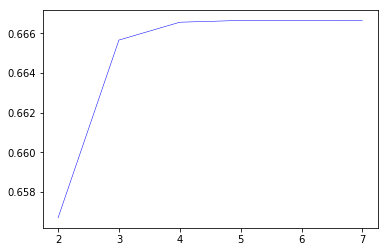

In [6]:
#Это явная схема Эйлера для упрощенной задачи, которая не расходится
res_l = np.zeros(6)
N = 10
for j in range(0, 6): 
    N *= 10
    h = 1.0 / N
    x_l = []
    z_l = []
    y_l = []
    z_l.append(0.0)
    y_l.append(0.0)
    x_l.append(0.0)
    i = 1
    while (i < N + 1 and z_l[i - 1] < 1.0):
        y_l.append(y_l[i - 1] + h * z_l[i - 1])
        z_l.append(z_l[i - 1] + 2 * h * (1 - i * h))
        x_l.append(i * h)
        res_l[j] = y_l[i]
        i += 1
        #print(z[i], y[i])
    
    print(res_l[j])
deg = [k for k in range(2, 8)]
plt.pyplot.plot(deg, res_l, c = 'b', linewidth = 0.5)
plt.pyplot.show()

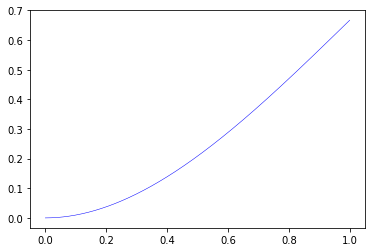

In [7]:
#Значения функции y полученные при N = 10^7 для упрощенной задачи
plt.pyplot.plot(x_l, y_l, c = 'b', linewidth = 0.5)
plt.pyplot.show()

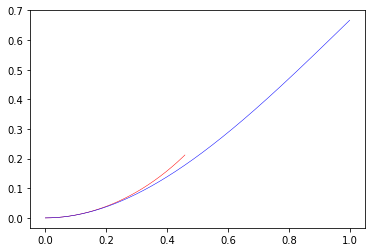

In [15]:
plt.pyplot.plot(x, y, c = 'r', linewidth = 0.5)
plt.pyplot.plot(x_l, y_l, c = 'b', linewidth = 0.5)
plt.pyplot.show()